In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gov_emp = pd.read_csv('Government_Employees_Demograpy.csv')

In [3]:
dav_pop_gender_age = pd.read_csv('Davidson_Demo_Age&Sex.csv')

In [4]:
dav_pop_race = pd.read_csv('Davidson_Demo_Race_copy.csv')

In [5]:
dav_pop_gender_age.head(10)

,Age,Male,Female
0,Under 5 years,22544,22336
1,5 to 9 years,19758,18249
2,10 to 14 years,17648,18382
3,15 to 17 years,10806,10816
4,18 and 19 years,8274,8767
5,20 years,3653,5620
6,21 years,4775,4256
7,22 to 24 years,16024,18174
8,25 to 29 years,34536,37783
9,30 to 34 years,35400,36474


In [6]:
dav_pop_race

,Race,Not Hispanic/Latino,Hispanic/Latino
0,White,393994,7299
1,Black,176918,1394
2,Native,94,1033
3,Asian,25038,107
4,Islander,408,0
5,Other,3588,18656
6,Two or more,30586,49029


In [7]:
dav_pop_race['Total'] = (dav_pop_race['Not Hispanic/Latino'] + dav_pop_race['Hispanic/Latino'])

In [8]:
dav_pop_race = dav_pop_race.sort_values(by='Total', ascending=False)

In [9]:
dav_pop_race

,Race,Not Hispanic/Latino,Hispanic/Latino,Total
0,White,393994,7299,401293
1,Black,176918,1394,178312
6,Two or more,30586,49029,79615
3,Asian,25038,107,25145
5,Other,3588,18656,22244
2,Native,94,1033,1127
4,Islander,408,0,408


In [10]:
dav_pop_race = dav_pop_race.drop(['Total'],axis = 1)

In [11]:
dav_pop_race

,Race,Not Hispanic/Latino,Hispanic/Latino
0,White,393994,7299
1,Black,176918,1394
6,Two or more,30586,49029
3,Asian,25038,107
5,Other,3588,18656
2,Native,94,1033
4,Islander,408,0


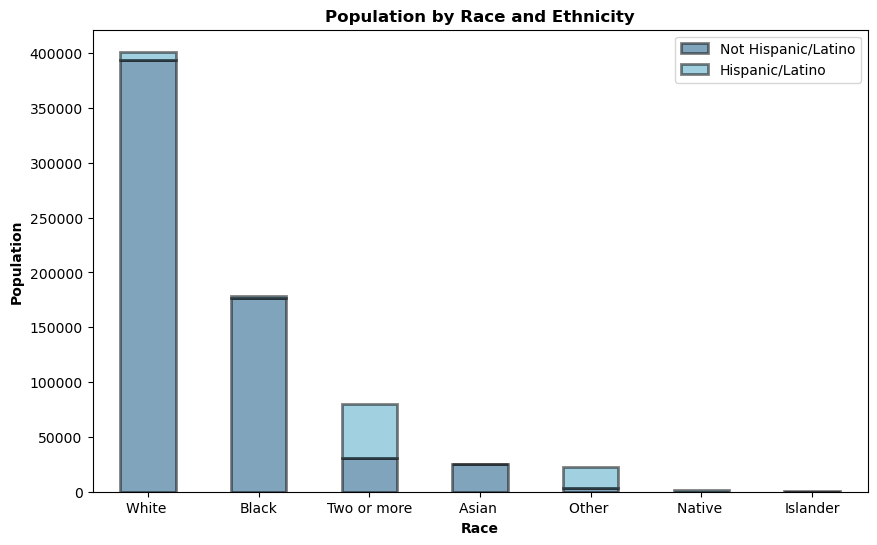

In [12]:
color = ["#024b7a", "#44a5c2"]
dav_pop_race.plot(kind='bar', stacked=True, x = 'Race',figsize = (10,6), color=color, alpha=0.5, edgecolor='black', linewidth=2)
plt.xlabel('Race',weight='bold')
plt.ylabel('Population',weight='bold')
plt.xticks(rotation = 0)
plt.title('Population by Race and Ethnicity', weight='bold')
plt.style.use('fivethirtyeight')
plt.show()

In [13]:
dav_pop_race.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 4
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Race                 7 non-null      object
 1   Not Hispanic/Latino  7 non-null      int64 
 2   Hispanic/Latino      7 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [14]:
# Only want ages above 15 (youngest gov worker in dataset)
dav_pop_gender_age = dav_pop_gender_age.iloc[3:]

In [15]:
dav_pop_gender_age

,Age,Male,Female
3,15 to 17 years,10806,10816
4,18 and 19 years,8274,8767
5,20 years,3653,5620
6,21 years,4775,4256
7,22 to 24 years,16024,18174
8,25 to 29 years,34536,37783
9,30 to 34 years,35400,36474
10,35 to 39 years,31279,26467
11,40 to 44 years,20560,24564
12,45 to 49 years,19834,19343


<Figure size 2000x1200 with 0 Axes>

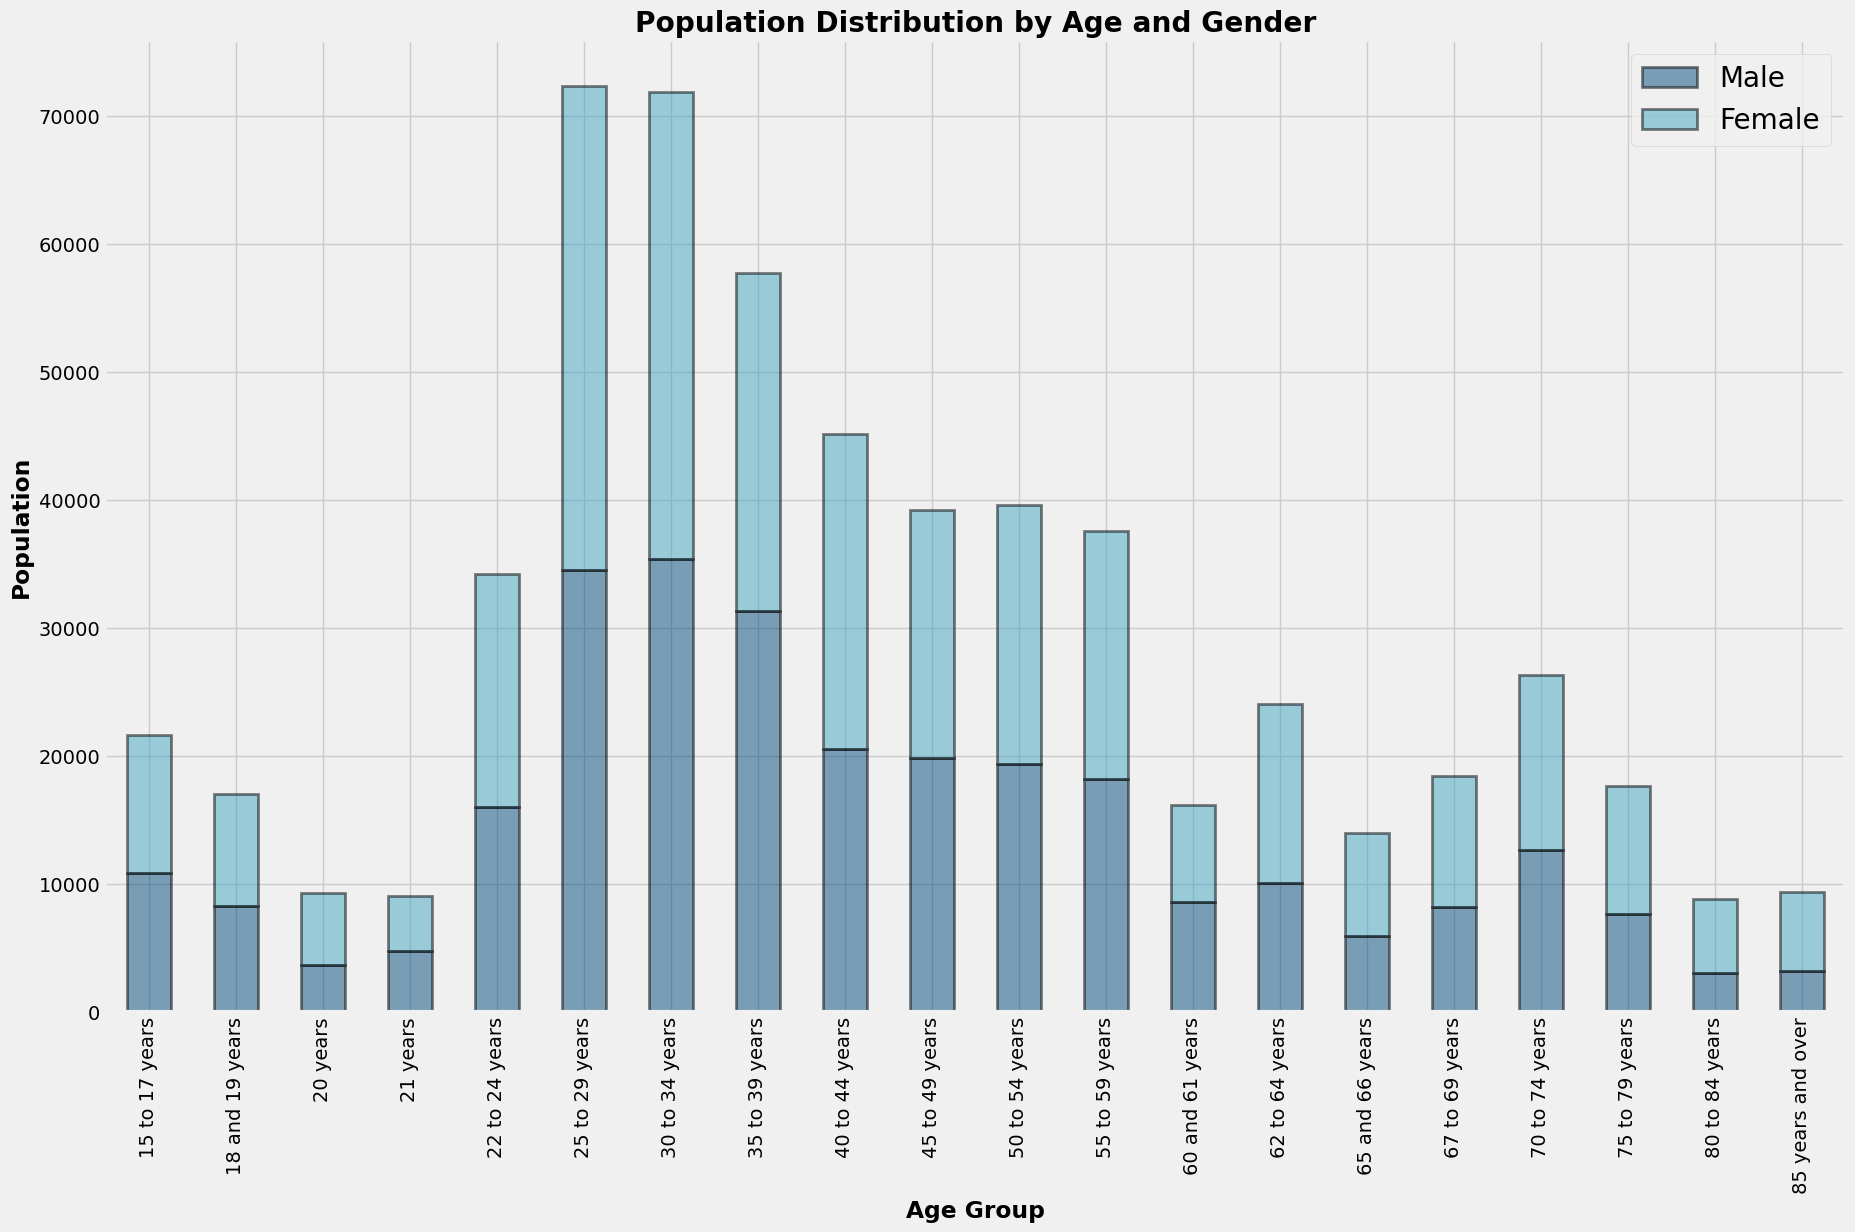

In [16]:
plt.figure(figsize=(20, 12))
color = ["#024b7a", "#44a5c2"]
dav_pop_gender_age.plot(kind = 'bar',x='Age', figsize = (20,12),stacked =True, color=color, alpha=0.5, edgecolor='black', linewidth=2)
plt.xlabel('Age Group',weight='bold')
plt.ylabel('Population',weight='bold')
plt.title('Population Distribution by Age and Gender',weight='bold')
plt.xticks(rotation=90)
plt.legend(fontsize=20)
plt.style.use('fivethirtyeight')
plt.show()

In [17]:
#bring the gov_employee data here
gov_emp.head()


,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County
0,OR06,43390.46,7757,Technical Specialist 2,Police,Parttime,Professionals,M,White,1950,7/16/1972,Y,Davidson
1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,8/18/1972,Y,Davidson
2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black or African American,1950,2/26/1973,Y,Davidson
3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,9/1/1974,Y,Davidson
4,FD03,76225.40,11172,Advanced Emergency Med Tech,Fire,Fulltime,Technicians,M,White,1954,11/1/1974,N,Wilson


In [18]:
gov_emp.shape

(10782, 13)

In [19]:
#gov_emp.info()

In [20]:
#change the Date Started column to datetime
gov_emp['Date Started'] = pd.to_datetime(gov_emp['Date Started'])


In [21]:
gov_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10782 entries, 0 to 10781
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Pay Grade / Step              10782 non-null  object        
 1   Annual Salary                 10693 non-null  float64       
 2   Class                         10782 non-null  int64         
 3   Title                         10782 non-null  object        
 4   Current Department            10782 non-null  object        
 5   Employment Status             10782 non-null  object        
 6   EEO Job Category Description  10782 non-null  object        
 7   Gender                        10782 non-null  object        
 8   Ethnic Code Description       10782 non-null  object        
 9   Year of Birth                 10782 non-null  int64         
 10  Date Started                  10782 non-null  datetime64[ns]
 11  FLSA Exempt?                

In [22]:
#create a current year column
gov_emp['Current_Year'] = pd.Timestamp('now').year

In [95]:
gov_emp

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
0,OR06,43390.46,7757,Technical Specialist 2,Police,Parttime,Professionals,M,White,1950,1972-07-16,Y,Davidson,2024,74,70 to 74 years,1972,52
1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,1972-08-18,Y,Davidson,2024,72,70 to 74 years,1972,52
2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black or African American,1950,1973-02-26,Y,Davidson,2024,74,70 to 74 years,1973,51
3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,1974-09-01,Y,Davidson,2024,68,67 to 69 years,1974,50
4,FD03,76225.40,11172,Advanced Emergency Med Tech,Fire,Fulltime,Technicians,M,White,1954,1974-11-01,N,Wilson,2024,70,70 to 74 years,1974,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10777,PS01,54900.89,3257,Police Officer Trainee,Police,Fulltime,Protective service workers,M,Two or More Races,2001,2024-04-01,N,Davidson,2024,23,22 to 24 years,2024,0
10778,PS01,54900.89,3257,Police Officer Trainee,Police,Fulltime,Protective service workers,M,White,1989,2024-04-01,N,Montgomery,2024,35,35 to 39 years,2024,0
10779,PS01,54900.89,3257,Police Officer Trainee,Police,Fulltime,Protective service workers,F,Hispanic or Latino of any race,2001,2024-04-01,N,Davidson,2024,23,22 to 24 years,2024,0
10780,PS01,54900.89,3257,Police Officer Trainee,Police,Fulltime,Protective service workers,F,Black or African American,2000,2024-04-01,N,Davidson,2024,24,22 to 24 years,2024,0


In [236]:
#Change long names to short ones and check the unique values under EEO Job Category Description column
gov_emp.replace({'Ethnic Code Description':{'White':'White','Black or African American': 'Black', 'Hispanic or Latino of any race': 'Hispanic','Two or More Races':'Two or more',
                   'Asian':'Asian','Native Hawaiian or Other Pacific':'Native','American Indian or Alaskan Native':'Islander'}},inplace = True)

gov_emp.replace({'EEO Job Category Description':{'Administrative support (including clerical and sales)':'Administrative support'}},inplace = True)
gov_emp['EEO Job Category Description'].unique()

array(['Professionals', 'Officials and administrators', 'Technicians',
       'Administrative support', 'Paraprofessionals',
       'Protective service workers', 'Service/Maintenance',
       'Skilled craft workers'], dtype=object)

In [237]:
# creatw Age column and start Age analysis
gov_emp['Age']= (gov_emp['Current_Year'] - gov_emp['Year of Birth'])

In [238]:
gov_emp['Age']

0        74
1        72
2        74
3        68
4        70
         ..
10777    23
10778    35
10779    23
10780    24
10781    36
Name: Age, Length: 10782, dtype: int64

In [239]:
gov_emp['Age'].mean()

44.357354850677055

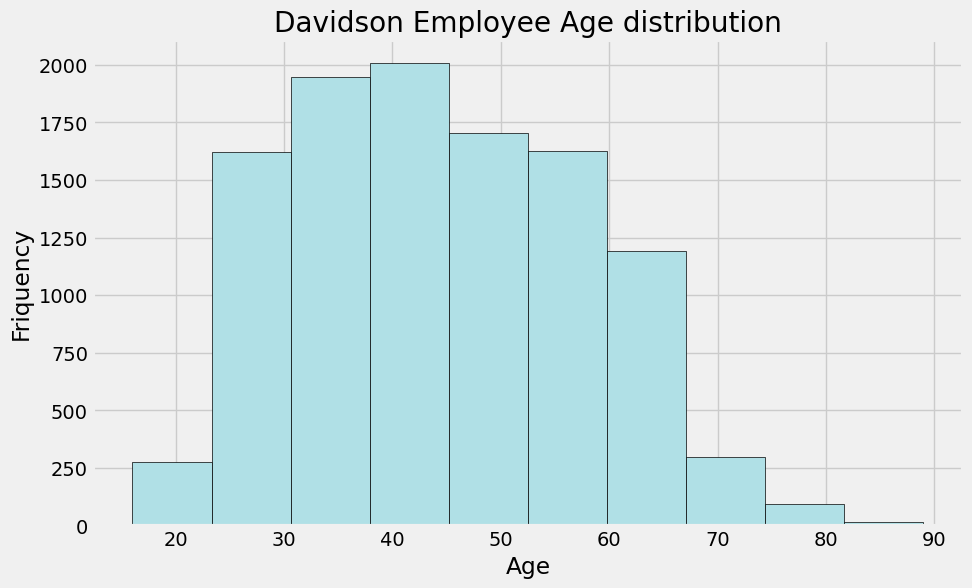

In [240]:
#calculate the age distribution
gov_emp['Age'].hist(figsize = (10,6), color = 'powderblue',edgecolor = 'black')
plt.title('Davidson Employee Age distribution')
plt.xlabel('Age')
plt.ylabel('Friquency')
plt.style.use('fivethirtyeight')
plt.show()

In [241]:
# create age range column
bins = [15, 18, 20, 21, 22, 25, 30, 35, 40, 45, 50, 55, 60, 62, 65, 67, 70, 75, 80, 85, 100]
labels = ['15 to 17 years', '18 and 19 years', '20 years', '21 years', '22 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years', '60 to 61 years', '62 to 64 years', '65 to 66 years', '67 to 69 years', '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 years and over']
gov_emp['Age_Group'] = pd.cut(gov_emp.Age, bins, labels = labels, right=False)

In [242]:
gov_emp[gov_emp['Age']==22]

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
5427,NS,1152.32,9020,Seasonal/Part-time/Temporary,State Fair Board,Seasonal,Service/Maintenance,F,Black,2002,2018-03-24,N,Davidson,2024,22,22 to 24 years,2018,6
5944,ST07,46667.76,6880,Recreation Leader,Parks,Fulltime,Paraprofessionals,F,Hispanic,2002,2019-05-25,N,Davidson,2024,22,22 to 24 years,2019,5
6954,ST07,21042.95,6880,Recreation Leader,Parks,Parttime,Paraprofessionals,M,Two or more,2002,2021-05-28,N,Davidson,2024,22,22 to 24 years,2021,3
6956,ST07,21721.74,6880,Recreation Leader,Parks,Parttime,Paraprofessionals,F,Two or more,2002,2021-05-28,N,Davidson,2024,22,22 to 24 years,2021,3
6970,ST07,21042.95,6880,Recreation Leader,Parks,Parttime,Paraprofessionals,F,Black,2002,2021-06-04,N,Davidson,2024,22,22 to 24 years,2021,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10624,CO00,46265.35,10879,Correctional Officer Trainee,Sheriff,Fulltime,Protective service workers,M,White,2002,2024-03-01,N,Rutherford,2024,22,22 to 24 years,2024,0
10639,ET01,46265.35,10407,Emer Telecommunications Off 1,Emergency Communications,Fulltime,Administrative support,F,White,2002,2024-03-04,N,Davidson,2024,22,22 to 24 years,2024,0
10652,MAC08B,52000.00,10236,Headstart Teacher 2,Metro Action Commission,Fulltime,Professionals,F,Black,2002,2024-03-04,N,Davidson,2024,22,22 to 24 years,2024,0
10684,FD03A,61978.22,11172,Advanced Emergency Med Tech,Fire,Fulltime,Technicians,M,White,2002,2024-03-16,N,Sumner,2024,22,22 to 24 years,2024,0


In [243]:
gov_emp_by_AgeGroup = gov_emp.groupby('Age_Group').size()

C:\Users\zenas\AppData\Local\Temp\ipykernel_8824\1340970423.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gov_emp_by_AgeGroup = gov_emp.groupby('Age_Group').size()


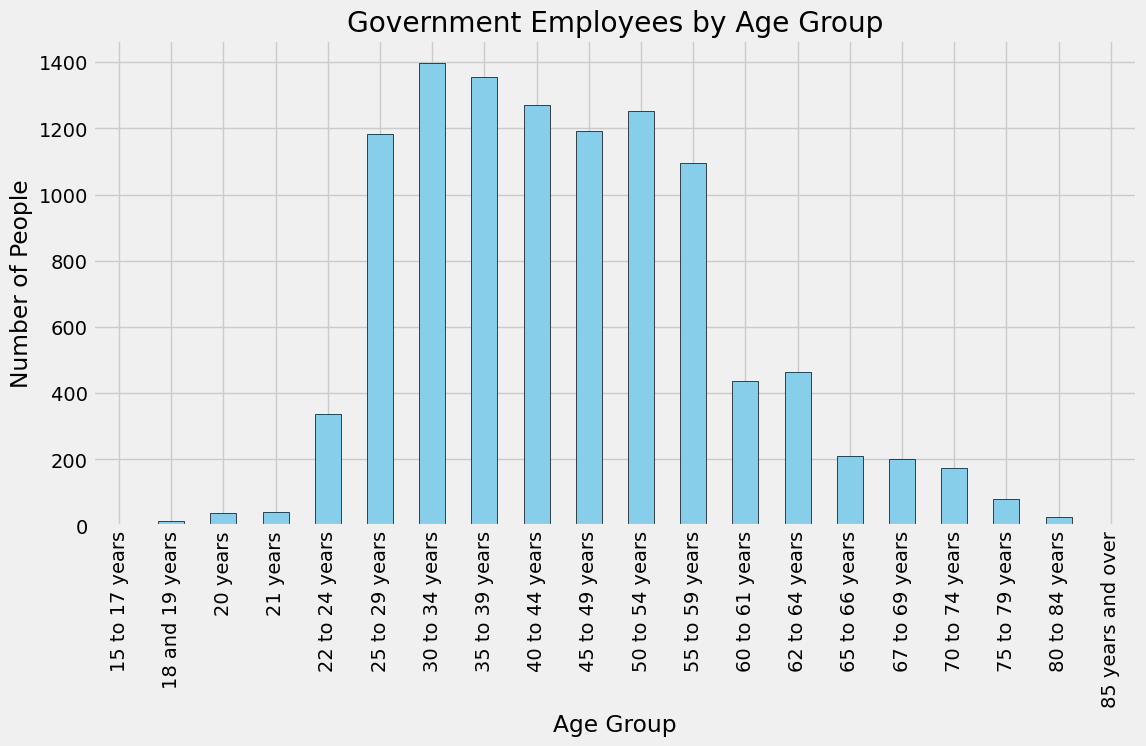

In [244]:

gov_emp_by_AgeGroup.plot(kind='bar', figsize = (12,6),
                         title = 'Government Employees by Age Group',
                         ylabel = 'Number of People',
                        xlabel = 'Age Group',
                        color='skyblue',
                        edgecolor='black')
plt.style.use('fivethirtyeight')
plt.show()

In [245]:
gov_emp.groupby('Age')['Annual Salary'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
16,3.0,7592.00,1981.47,5304.00,7020.00,8736.00,8736.00,8736.00
17,2.0,1081.34,341.59,839.80,960.57,1081.34,1202.11,1322.88
18,2.0,19173.07,5935.55,14976.00,17074.53,19173.07,21271.60,23370.13
19,12.0,28735.81,14757.10,0.00,19765.91,30025.28,40826.33,45760.00
20,38.0,28798.73,16823.75,0.00,19549.84,36199.80,42425.32,51011.48
...,...,...,...,...,...,...,...,...
85,1.0,15940.08,NaN,15940.08,15940.08,15940.08,15940.08,15940.08
86,1.0,2045.47,NaN,2045.47,2045.47,2045.47,2045.47,2045.47
87,2.0,24976.28,7875.95,19407.14,22191.71,24976.28,27760.85,30545.42


In [246]:
salary_by_age = gov_emp.groupby('Age')['Annual Salary'].mean().round(2)

In [247]:
salary_by_age

Age
16     7592.00
17     1081.34
18    19173.07
19    28735.81
20    28798.73
        ...   
85    15940.08
86     2045.47
87    24976.28
88    27304.37
89     8543.89
Name: Annual Salary, Length: 74, dtype: float64

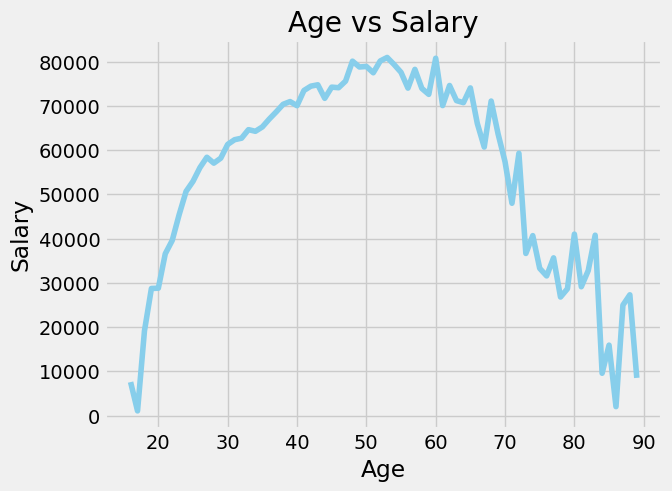

In [248]:
ax = (gov_emp.groupby('Age')['Annual Salary'].mean().plot(kind = 'line', color='skyblue'))
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.style.use('fivethirtyeight')
plt.show()

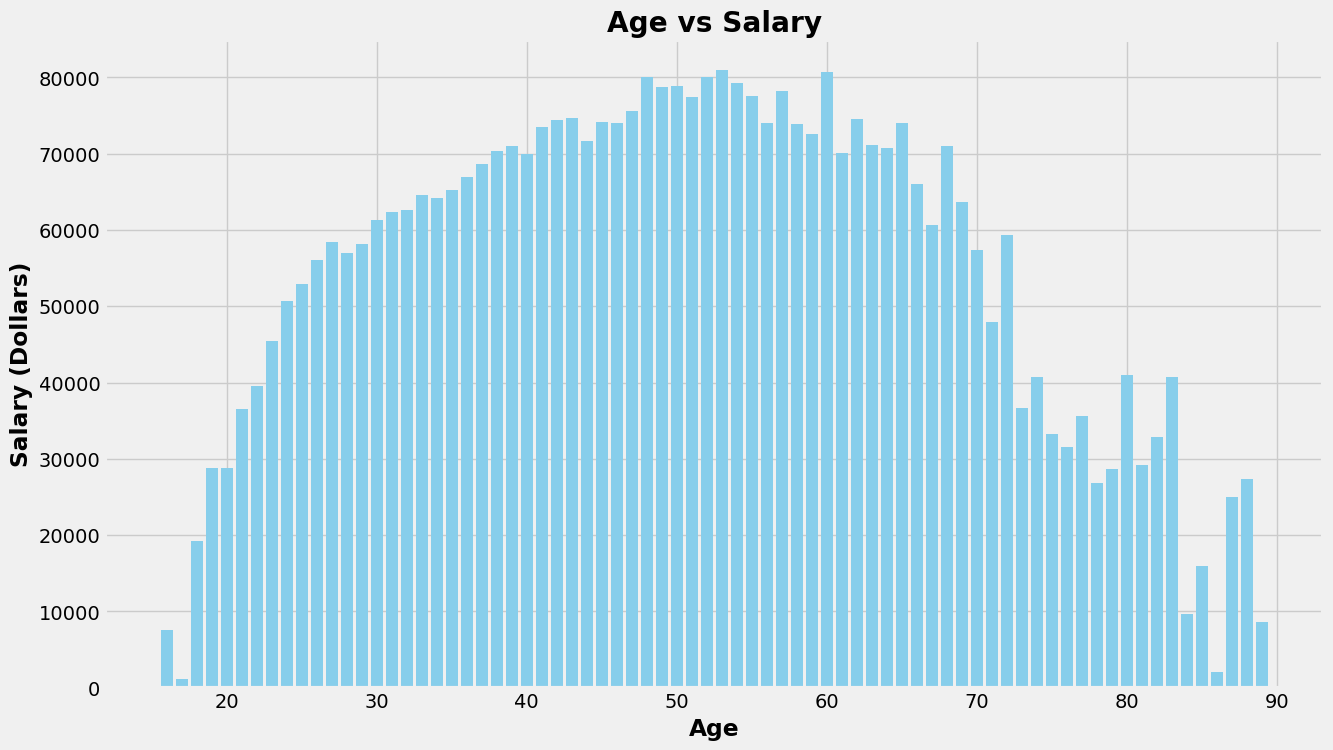

In [249]:
#plt.style.use('default')
plt.figure(figsize=(14, 8))


age_salary_mean = gov_emp.groupby('Age')['Annual Salary'].mean()

plt.bar(age_salary_mean.index, age_salary_mean.values, color='skyblue')

plt.xlabel('Age', weight='bold')
plt.ylabel('Salary (Dollars)', weight='bold')
plt.title('Age vs Salary', weight='bold')
plt.style.use('fivethirtyeight')
plt.show()

In [250]:
gov_emp.groupby('Annual Salary')['Age'].mean().reset_index()

,Annual Salary,Age
0,0.00,39.19403
1,691.39,61.00000
2,800.48,47.00000
3,839.80,17.00000
4,1103.25,21.00000
...,...,...
2641,254769.89,60.00000
2642,265588.15,60.00000
2643,276162.35,65.00000
2644,297625.23,60.00000


In [251]:
#create a started year column 
#calculate year of service
gov_emp['Started_Year'] = gov_emp['Date Started'].dt.year

In [252]:
gov_emp.head()

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
0,OR06,43390.46,7757,Technical Specialist 2,Police,Parttime,Professionals,M,White,1950,1972-07-16,Y,Davidson,2024,74,70 to 74 years,1972,52
1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,1972-08-18,Y,Davidson,2024,72,70 to 74 years,1972,52
2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black,1950,1973-02-26,Y,Davidson,2024,74,70 to 74 years,1973,51
3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,1974-09-01,Y,Davidson,2024,68,67 to 69 years,1974,50
4,FD03,76225.40,11172,Advanced Emergency Med Tech,Fire,Fulltime,Technicians,M,White,1954,1974-11-01,N,Wilson,2024,70,70 to 74 years,1974,50


In [253]:
#create a Year Of Service column to see the distribution across all depts.
gov_emp['Year_Of_Service'] = gov_emp['Current_Year']-gov_emp['Started_Year']

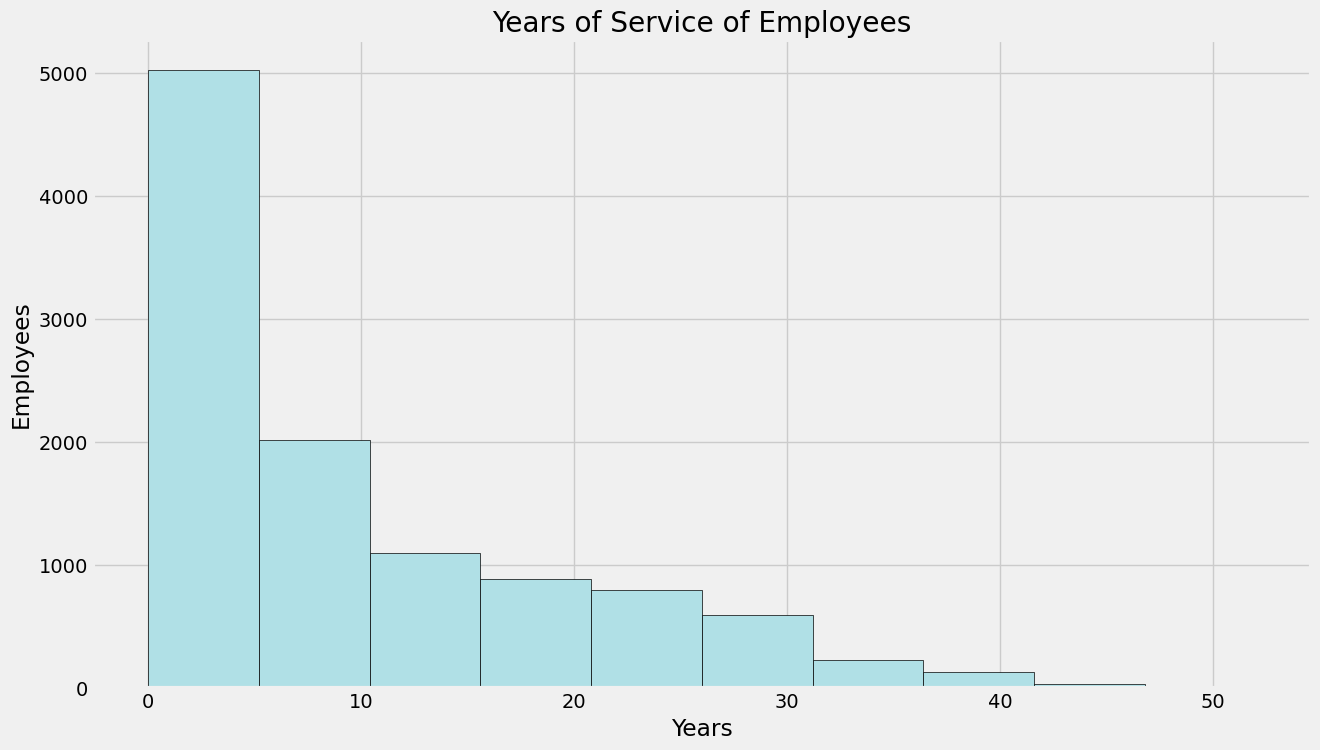

In [254]:
plt.figure(figsize=(14, 8))
# plt.style.use('default')
gov_emp['Year_Of_Service'].hist(edgecolor='black', color='powderblue')
plt.title('Years of Service of Employees')
plt.xlabel('Years')
plt.ylabel('Employees')
plt.style.use('fivethirtyeight')

In [255]:
gov_emp.groupby('Gender')['Year_Of_Service'].max().reset_index()

,Gender,Year_Of_Service
0,F,52
1,M,52


In [256]:
gov_emp[gov_emp['Year_Of_Service']==52]

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
0,OR06,43390.46,7757,Technical Specialist 2,Police,Parttime,Professionals,M,White,1950,1972-07-16,Y,Davidson,2024,74,70 to 74 years,1972,52
1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,1972-08-18,Y,Davidson,2024,72,70 to 74 years,1972,52


In [257]:
gov_emp_by_county = gov_emp.groupby('County')['Pay Grade / Step'].count().sort_values(ascending = False).reset_index()
gov_emp_by_county = gov_emp_by_county.nlargest(10, 'Pay Grade / Step')
gov_emp_by_county = gov_emp_by_county.rename(columns = {'Pay Grade / Step':'Total Employees'})
gov_emp_by_county = gov_emp_by_county[0:10].sort_values(by='Total Employees')

In [258]:
gov_emp_by_county

,County,Total Employees
9,Maury,101
8,Dickson,212
7,Cheatham,398
6,Montgomery,410
5,Williamson,514
4,Robertson,535
3,Wilson,731
2,Rutherford,944
1,Sumner,1014
0,Davidson,5656


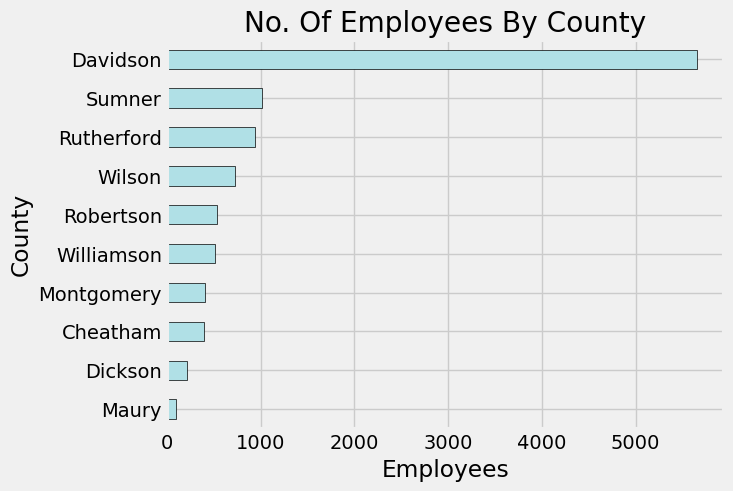

In [259]:
gov_emp_by_county.plot(kind = 'barh',   x= 'County' , 
                       title = 'No. Of Employees By County',
                       xlabel = 'Employees', 
                       ylabel = 'County', 
                       legend = False,
                       color = 'powderblue',
                       edgecolor = 'black' 
                      )
plt.show()

In [260]:
#gov_emp.groupby('County')['Annual Salary'].max().reset_index()

In [261]:
gov_emp['Annual Salary'].max()

387989.6

In [262]:
gov_emp[gov_emp['Annual Salary']==387989.60]

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
2010,CA12,387989.6,10663,President/CEO-Conv Center,Convention Center Authority,Fulltime,Officials and administrators,M,White,1960,2005-03-30,Y,Wilson,2024,64,62 to 64 years,2005,19


In [263]:
gov_emp['Annual Salary'].min()

0.0

In [264]:
gov_emp[gov_emp['Annual Salary']==0.0]

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
3851,NS,0.0,9108,Sports Official,Parks,Pool,Service/Maintenance,M,White,1958,2014-04-02,N,Davidson,2024,66,65 to 66 years,2014,10
5289,NS,0.0,9108,Sports Official,Parks,Pool,Service/Maintenance,M,White,1995,2017-11-24,N,Davidson,2024,29,25 to 29 years,2017,7
5509,NS,0.0,9020,Seasonal/Part-time/Temporary,Parks,Pool,Service/Maintenance,F,White,1995,2018-05-25,N,Davidson,2024,29,25 to 29 years,2018,6
5963,NS,0.0,9020,Seasonal/Part-time/Temporary,Parks,Pool,Service/Maintenance,F,White,1998,2019-06-14,N,Davidson,2024,26,25 to 29 years,2019,5
7005,NS,0.0,9108,Sports Official,Parks,Pool,Service/Maintenance,M,White,1996,2021-06-23,N,Davidson,2024,28,25 to 29 years,2021,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,NS,0.0,9020,Seasonal/Part-time/Temporary,Parks,Pool,Service/Maintenance,M,White,1995,2023-11-13,N,Rutherford,2024,29,25 to 29 years,2023,1
10272,NS,0.0,9020,Seasonal/Part-time/Temporary,Parks,Pool,Service/Maintenance,F,White,1996,2023-12-22,N,Davidson,2024,28,25 to 29 years,2023,1
10273,NS,0.0,9020,Seasonal/Part-time/Temporary,Parks,Pool,Service/Maintenance,F,Black,1974,2023-12-22,N,Davidson,2024,50,50 to 54 years,2023,1
10671,NS,0.0,9020,Seasonal/Part-time/Temporary,Parks,Pool,Service/Maintenance,M,Two or more,2005,2024-03-11,N,Sumner,2024,19,18 and 19 years,2024,0


In [265]:
gov_emp['Date Started'].max()

Timestamp('2024-04-01 00:00:00')

In [266]:
gov_emp['Date Started'].min()

Timestamp('1972-07-16 00:00:00')

In [267]:
gov_emp[gov_emp['Date Started']=='1972-07-16 00:00:00']

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
0,OR06,43390.46,7757,Technical Specialist 2,Police,Parttime,Professionals,M,White,1950,1972-07-16,Y,Davidson,2024,74,70 to 74 years,1972,52


In [268]:
gov_emp.groupby('Current Department')['Annual Salary'].mean().round(2).reset_index()
gov_emp_by_dept = gov_emp.nlargest(20, 'Annual Salary')
gov_emp_by_dept

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
2010,CA12,387989.60,10663,President/CEO-Conv Center,Convention Center Authority,Fulltime,Officials and administrators,M,White,1960,2005-03-30,Y,Wilson,2024,64,62 to 64 years,2005,19
1397,DP02,297625.23,1670,Water Svcs Dir,Water Services,Fulltime,Officials and administrators,M,White,1964,2001-10-15,Y,Davidson,2024,60,60 to 61 years,2001,23
5068,NS,276162.35,1080,Chief Medical Dir,Health,Fulltime,Officials and administrators,M,White,1959,2017-05-30,Y,Davidson,2024,65,65 to 66 years,2017,7
170,DP02,265588.15,1110,Police Chief,Police,Fulltime,Officials and administrators,M,Black,1964,1988-03-16,Y,Wilson,2024,60,60 to 61 years,1988,36
7474,DP02,254769.89,11121,Transportation Director,NDOT,Fulltime,Officials and administrators,F,White,1964,2022-01-10,Y,Davidson,2024,60,60 to 61 years,2022,2
4387,NS,251510.82,11103,Director of Development/Spec Projects,Planning Commission,Fulltime,Officials and administrators,M,White,1956,2015-10-26,Y,Davidson,2024,68,67 to 69 years,2015,9
9853,NS,250000.00,11296,Chief Development Officer-MO,Mayor's Office,Fulltime,Officials and administrators,M,White,1966,2023-09-25,Y,Davidson,2024,58,55 to 59 years,2023,1
9939,DP02,247700.00,1570,Finance Dir,Finance,Fulltime,Officials and administrators,M,White,1965,2023-10-16,Y,Davidson,2024,59,55 to 59 years,2023,1
1121,DP02,246471.73,10223,Exec Dir,Metro Action Commission,Fulltime,Officials and administrators,F,Black,1962,2000-07-01,Y,Davidson,2024,62,62 to 64 years,2000,24
589,DP02,245526.61,1045,Fire Chief,Fire,Fulltime,Officials and administrators,M,Black,1967,1995-09-01,Y,Davidson,2024,57,55 to 59 years,1995,29


In [269]:
gov_emp_category = gov_emp.groupby('EEO Job Category Description')['Gender'].value_counts().unstack()
gov_emp_category['Total'] = gov_emp_category['M'] + gov_emp_category['F']
gov_emp_category['Female(%)'] = (gov_emp_category['F'] / gov_emp_category['Total'] * 100).round(2)
gov_emp_category['Male(%)'] = (gov_emp_category['M'] / gov_emp_category['Total'] * 100).round(2)
gov_emp_category

Gender,F,M,Total,Female(%),Male(%)
EEO Job Category Description,,,,,
Administrative support,769,382,1151,66.81,33.19
Officials and administrators,434,631,1065,40.75,59.25
Paraprofessionals,289,166,455,63.52,36.48
Professionals,1739,1345,3084,56.39,43.61
Protective service workers,495,1894,2389,20.72,79.28
Service/Maintenance,271,758,1029,26.34,73.66
Skilled craft workers,18,275,293,6.14,93.86
Technicians,240,1076,1316,18.24,81.76


In [270]:
#Don't run this
#job_category = gov_emp_category.reset_index().replace({'EEO Job Category Description':{'Administrative support (including clerical and sales)':'Administrative support'}})

In [271]:
gov_emp['Annual Salary'].sort_values(ascending = False)

2010    387989.60
1397    297625.23
5068    276162.35
170     265588.15
7474    254769.89
          ...    
6791          NaN
6914          NaN
9029          NaN
9707          NaN
9715          NaN
Name: Annual Salary, Length: 10782, dtype: float64

In [272]:
gov_emp.isna().sum()

Pay Grade / Step                 0
Annual Salary                   89
Class                            0
Title                            0
Current Department               0
Employment Status                0
EEO Job Category Description     0
Gender                           0
Ethnic Code Description          0
Year of Birth                    0
Date Started                     0
FLSA Exempt?                     9
County                           0
Current_Year                     0
Age                              0
Age_Group                        0
Started_Year                     0
Year_Of_Service                  0
dtype: int64

In [273]:
#check NaN values
#gov_emp[gov_emp.isna().any(axis=1)]


In [274]:
gov_emp.groupby('Employment Status').size()

Employment Status
Elected                61
Fulltime             9644
Intern / Student       16
Parttime              854
Pool                  152
Satellite (Quasi)       9
Seasonal               46
dtype: int64

# Davidson

In [275]:
# Davidson county only
gov_emp_davidson = gov_emp[gov_emp['County']=='Davidson']

In [276]:
gov_emp_davidson

,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
0,OR06,43390.46,7757,Technical Specialist 2,Police,Parttime,Professionals,M,White,1950,1972-07-16,Y,Davidson,2024,74,70 to 74 years,1972,52
1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,1972-08-18,Y,Davidson,2024,72,70 to 74 years,1972,52
2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black,1950,1973-02-26,Y,Davidson,2024,74,70 to 74 years,1973,51
3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,1974-09-01,Y,Davidson,2024,68,67 to 69 years,1974,50
5,NS,83001.18,6505,Deputy Criminal Ct Clerk 4,Criminal Court Clerk,Fulltime,Administrative support,F,White,1950,1975-12-05,N,Davidson,2024,74,70 to 74 years,1975,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,ST07,31818.99,6880,Recreation Leader,Parks,Parttime,Paraprofessionals,M,White,2000,2024-03-25,N,Davidson,2024,24,22 to 24 years,2024,0
10775,PS01,54900.89,3257,Police Officer Trainee,Police,Fulltime,Protective service workers,M,White,1997,2024-04-01,N,Davidson,2024,27,25 to 29 years,2024,0
10777,PS01,54900.89,3257,Police Officer Trainee,Police,Fulltime,Protective service workers,M,Two or more,2001,2024-04-01,N,Davidson,2024,23,22 to 24 years,2024,0
10779,PS01,54900.89,3257,Police Officer Trainee,Police,Fulltime,Protective service workers,F,Hispanic,2001,2024-04-01,N,Davidson,2024,23,22 to 24 years,2024,0


In [277]:
#gov_emp_davidson.groupby('Current Department')['Annual Salary'].mean().round(2).sort_values(ascending = False).reset_index()

In [278]:
#gov_emp_davidson.groupby('Current Department').size().sort_values(ascending = False)

In [279]:
#gov_emp_davidson.groupby('Current Department').size().sort_values(ascending = False)

In [280]:
#Find employment status
gov_emp_davidson['Employment Status'].value_counts()

Employment Status
Fulltime             4831
Parttime              584
Pool                  126
Elected                61
Seasonal               37
Intern / Student       11
Satellite (Quasi)       6
Name: count, dtype: int64

In [281]:
dav_fulltime_emp = gov_emp_davidson[gov_emp_davidson['Employment Status'] == 'Fulltime'].reset_index()
dav_fulltime_emp.head()

,index,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
0,1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,1972-08-18,Y,Davidson,2024,72,70 to 74 years,1972,52
1,2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black,1950,1973-02-26,Y,Davidson,2024,74,70 to 74 years,1973,51
2,3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,1974-09-01,Y,Davidson,2024,68,67 to 69 years,1974,50
3,5,NS,83001.18,6505,Deputy Criminal Ct Clerk 4,Criminal Court Clerk,Fulltime,Administrative support,F,White,1950,1975-12-05,N,Davidson,2024,74,70 to 74 years,1975,49
4,6,ST08,52433.92,11183,Library Associate,Public Library,Fulltime,Paraprofessionals,F,White,1952,1977-02-14,N,Davidson,2024,72,70 to 74 years,1977,47


In [282]:
#No. of fulltime employees
len(dav_fulltime_emp)

4831

# Age

In [283]:
#dav_fulltime_emp.groupby('Age_Group').size()

C:\Users\zenas\AppData\Local\Temp\ipykernel_8824\3494930156.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dav_fulltime_emp.groupby('Age_Group').size().plot(kind = 'bar',


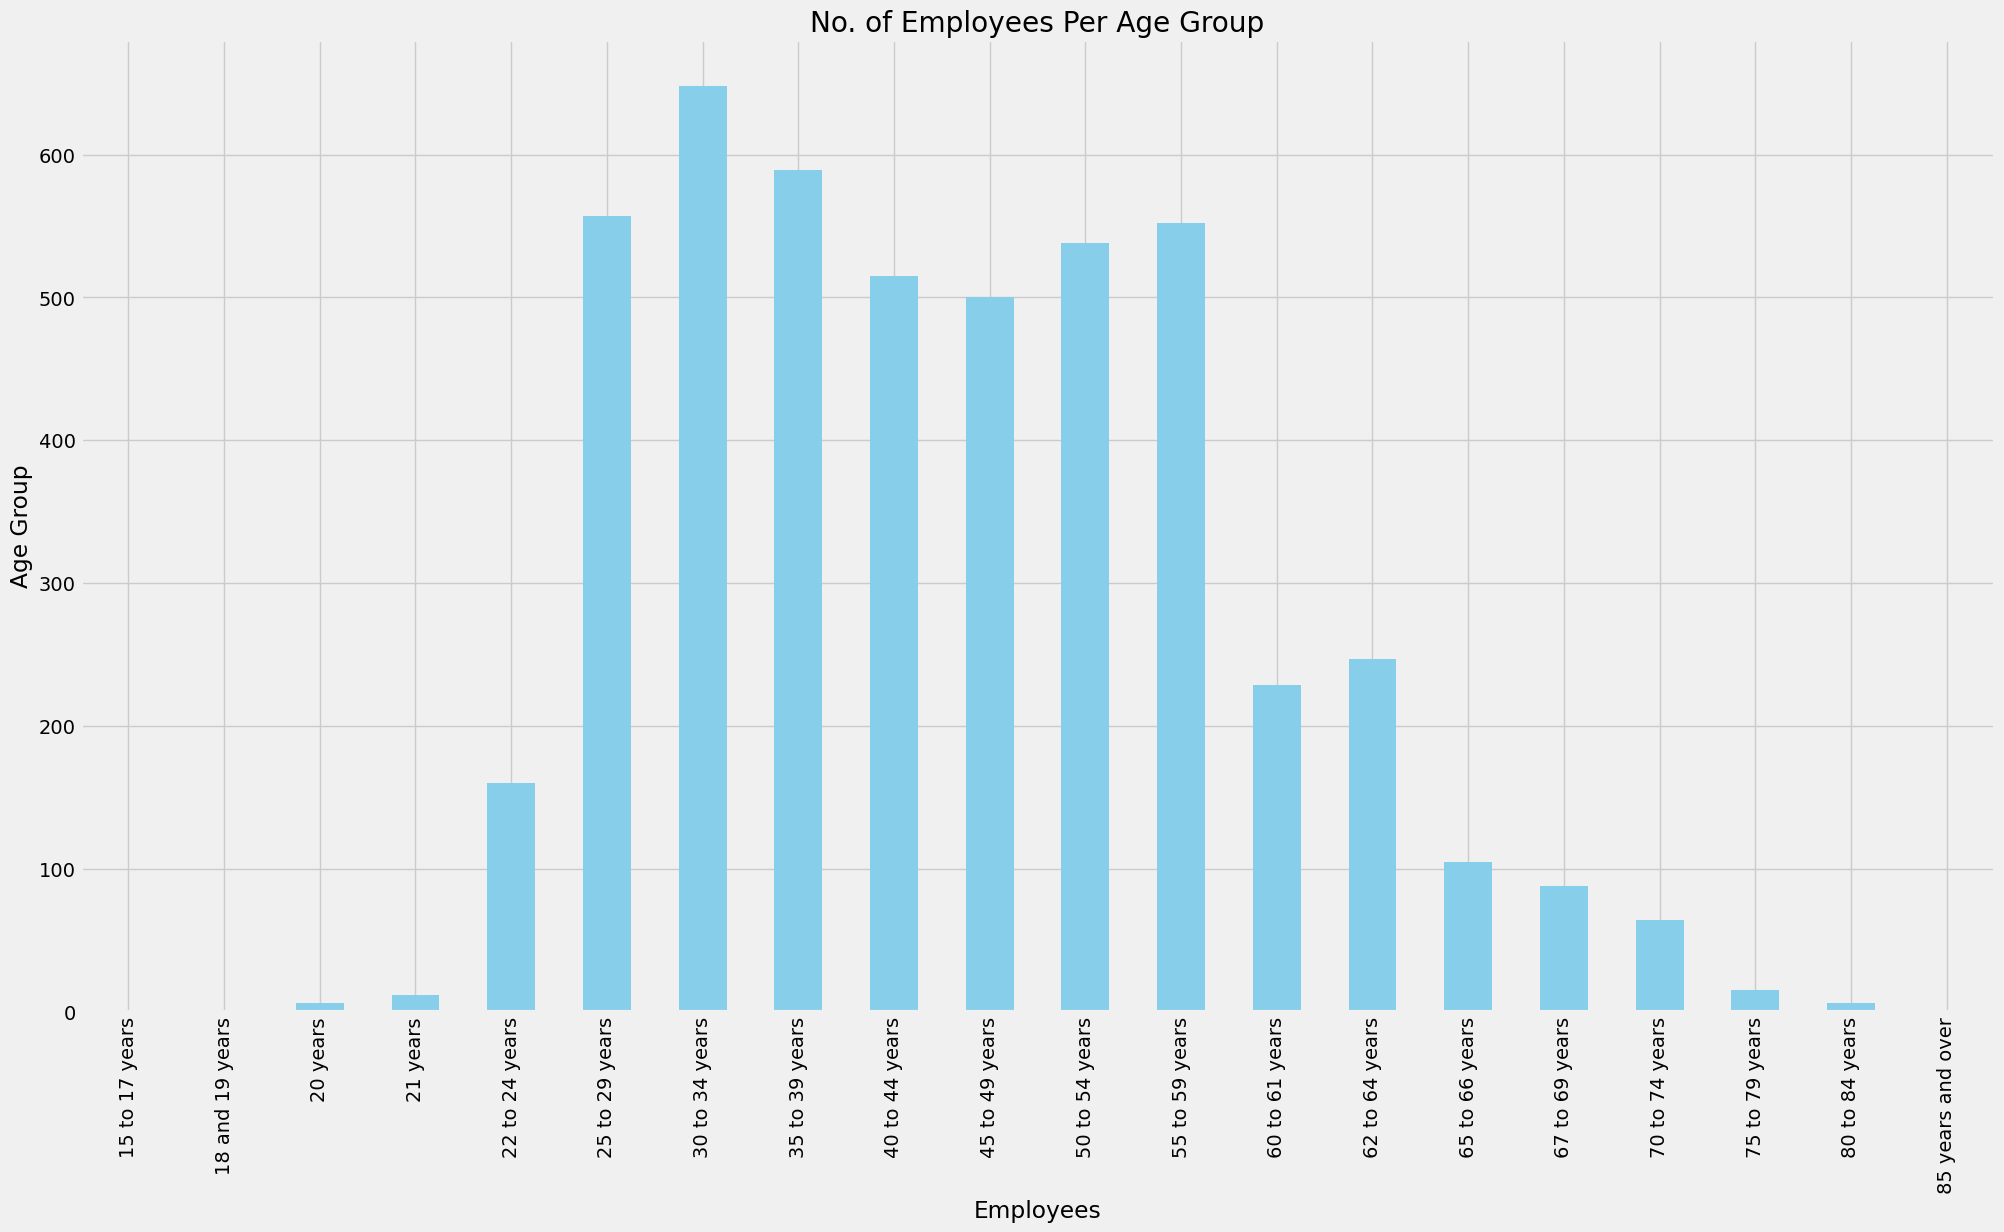

In [284]:
#Age distribution
plt.figure(figsize=(22, 12))
dav_fulltime_emp.groupby('Age_Group').size().plot(kind = 'bar',
                                                 color='skyblue',
                                                  title='No. of Employees Per Age Group',
                                                  xlabel='Employees',
                                                 ylabel='Age Group')
plt.style.use('fivethirtyeight')
plt.show()


Average salary of Fulltime employee

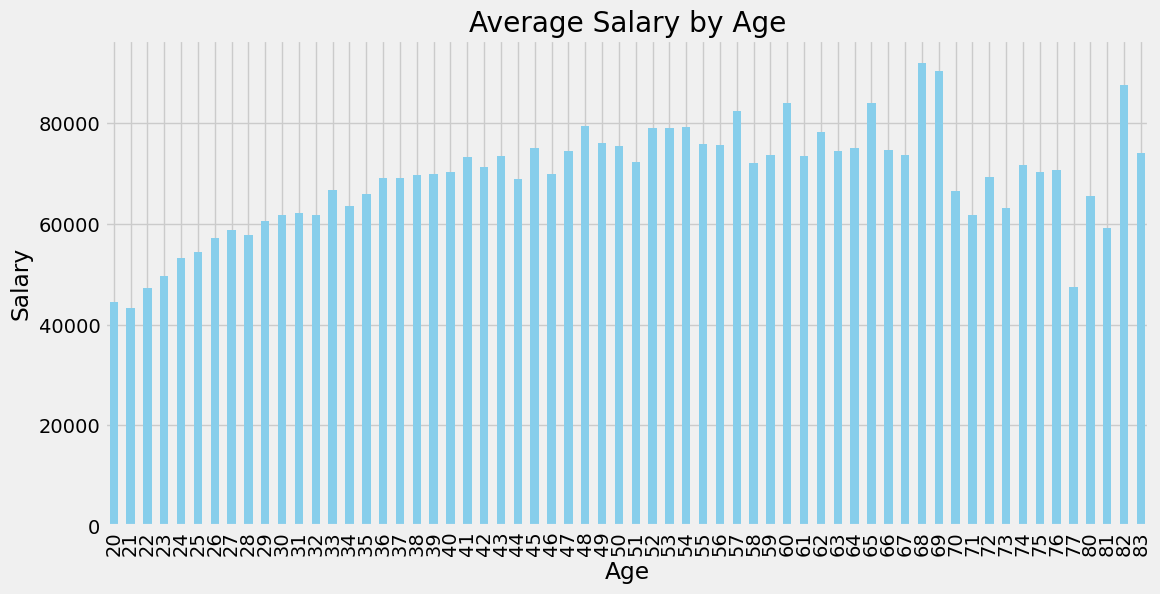

In [285]:
plt.figure(figsize=(12, 6))
ax = (dav_fulltime_emp.groupby('Age')['Annual Salary'].mean().plot(kind = 'bar',color = 'skyblue'))
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Average Salary by Age')
plt.style.use('fivethirtyeight')
plt.show()

# Gender

In [286]:
#By Gender
dav_fulltime_emp['Gender'].value_counts()

Gender
M    2676
F    2155
Name: count, dtype: int64

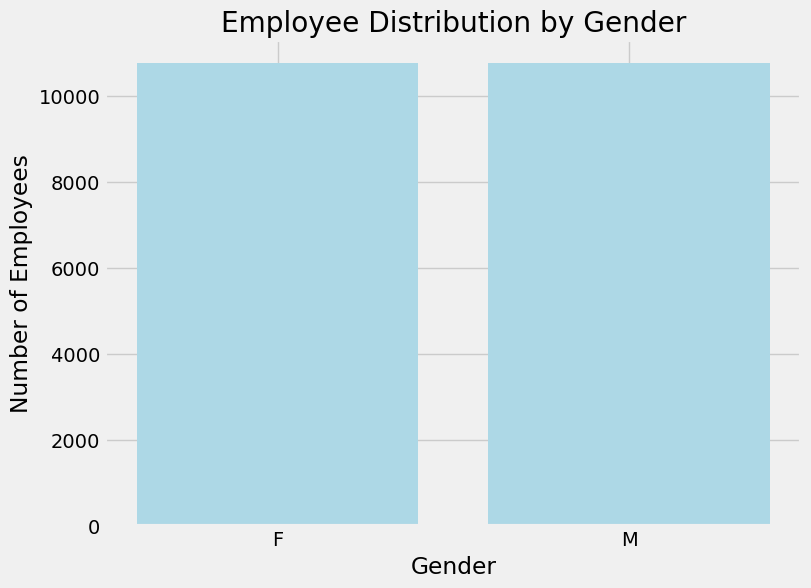

In [287]:
plt.figure(figsize=(8, 6))
plt.bar(dav_fulltime_emp['Gender'], dav_fulltime_emp['index'], color = 'lightblue')
plt.title('Employee Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.style.use('fivethirtyeight')

plt.show()

In [288]:
dav_fulltime_emp.groupby('Gender')['Annual Salary'].mean().sort_values(ascending = False)

Gender
M    72047.084383
F    67712.967666
Name: Annual Salary, dtype: float64

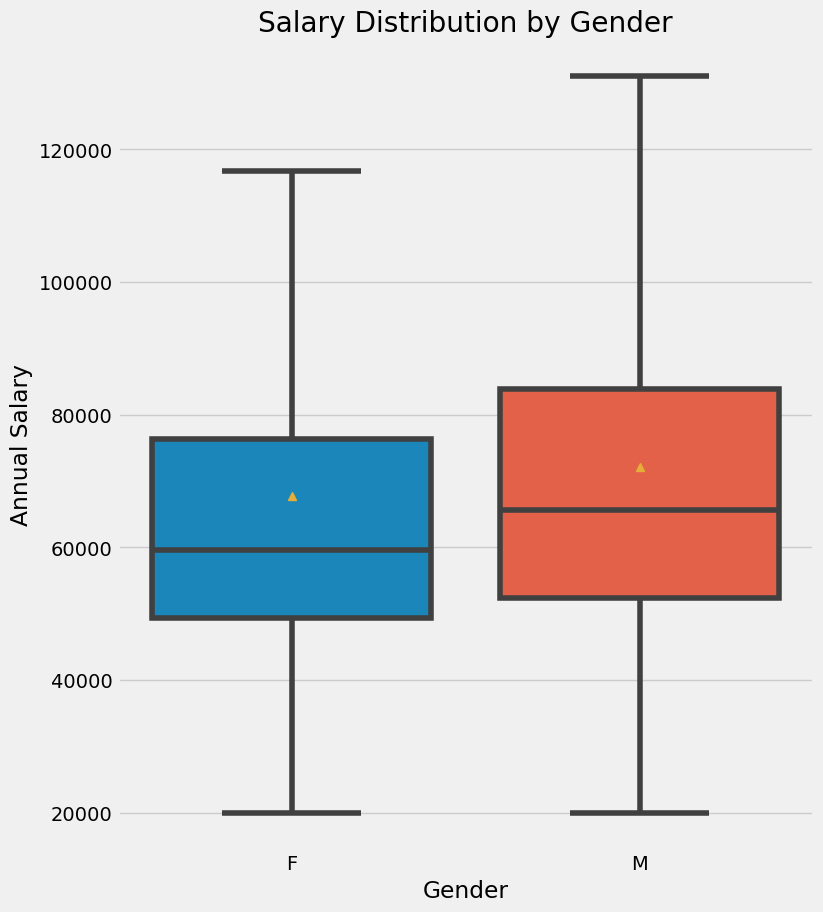

In [289]:
# gov_emp_davidson.groupby('Gender')['Annual Salary'].describe()

plt.figure(figsize=(8, 10))
sns.boxplot(x='Gender', y='Annual Salary', data=dav_fulltime_emp, showfliers=False, showmeans=True)
plt.style.use('fivethirtyeight')
plt.title('Salary Distribution by Gender')
plt.show()

In [290]:
dav_fulltime_emp.groupby(['Title', 'Gender'])['Annual Salary'].mean().sort_values(ascending = False).unstack().dropna()

Gender,F,M
Title,,
311 Call Center Specialist Sr,50506.247500,52433.920000
Accountant,68478.334000,75253.160000
Accountant Senior,78497.820000,79854.290000
Accounts Payable Specialist 2,57801.260000,66900.210000
Admin Asst,58304.257222,61384.145000
...,...,...
Warrant Officer 1,50583.344000,55132.652500
Warrant Officer 2,57179.850000,60543.283333
Water Services Asst Manager,94455.680000,113468.170000


In [291]:
# avg_salary_dep = dav_fulltime_emp.groupby(['Current Department', 'Gender'])['Annual Salary'].mean().round(2).unstack().dropna()
# avg_salary_dep

In [292]:
#pay_grade_gender = gov_emp_davidson.groupby(['Pay Grade / Step','Gender'])['Annual Salary'].mean().unstack().round(2).dropna()

In [293]:
#pay_grade_gender 

In [294]:

# color = ["#44a5c2", "#ffae49"]
# pay_grade_gender.plot(kind = 'bar',figsize = (20,12),stacked =True, color=color, edgecolor='black', linewidth=0.5, grid=False)
# plt.title('Average Annual Salary by Pay Grade and Gender',fontsize =20)
# plt.xlabel('Pay Grade',fontsize =16)
# plt.ylabel('Average Annual Salary',fontsize =16)
# plt.yticks(fontsize = 16)
# plt.legend(title = 'Gender',fontsize =20)
# plt.xticks(rotation = 90,fontsize = 12)
# plt.style.use('fivethirtyeight')
# plt.show()

#postion by Gender

In [295]:
dav_fulltime_emp.head(3)

,index,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
0,1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,1972-08-18,Y,Davidson,2024,72,70 to 74 years,1972,52
1,2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black,1950,1973-02-26,Y,Davidson,2024,74,70 to 74 years,1973,51
2,3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,1974-09-01,Y,Davidson,2024,68,67 to 69 years,1974,50


In [296]:
dav_emp_Postion = dav_fulltime_emp.groupby('EEO Job Category Description')['Gender'].value_counts().unstack()

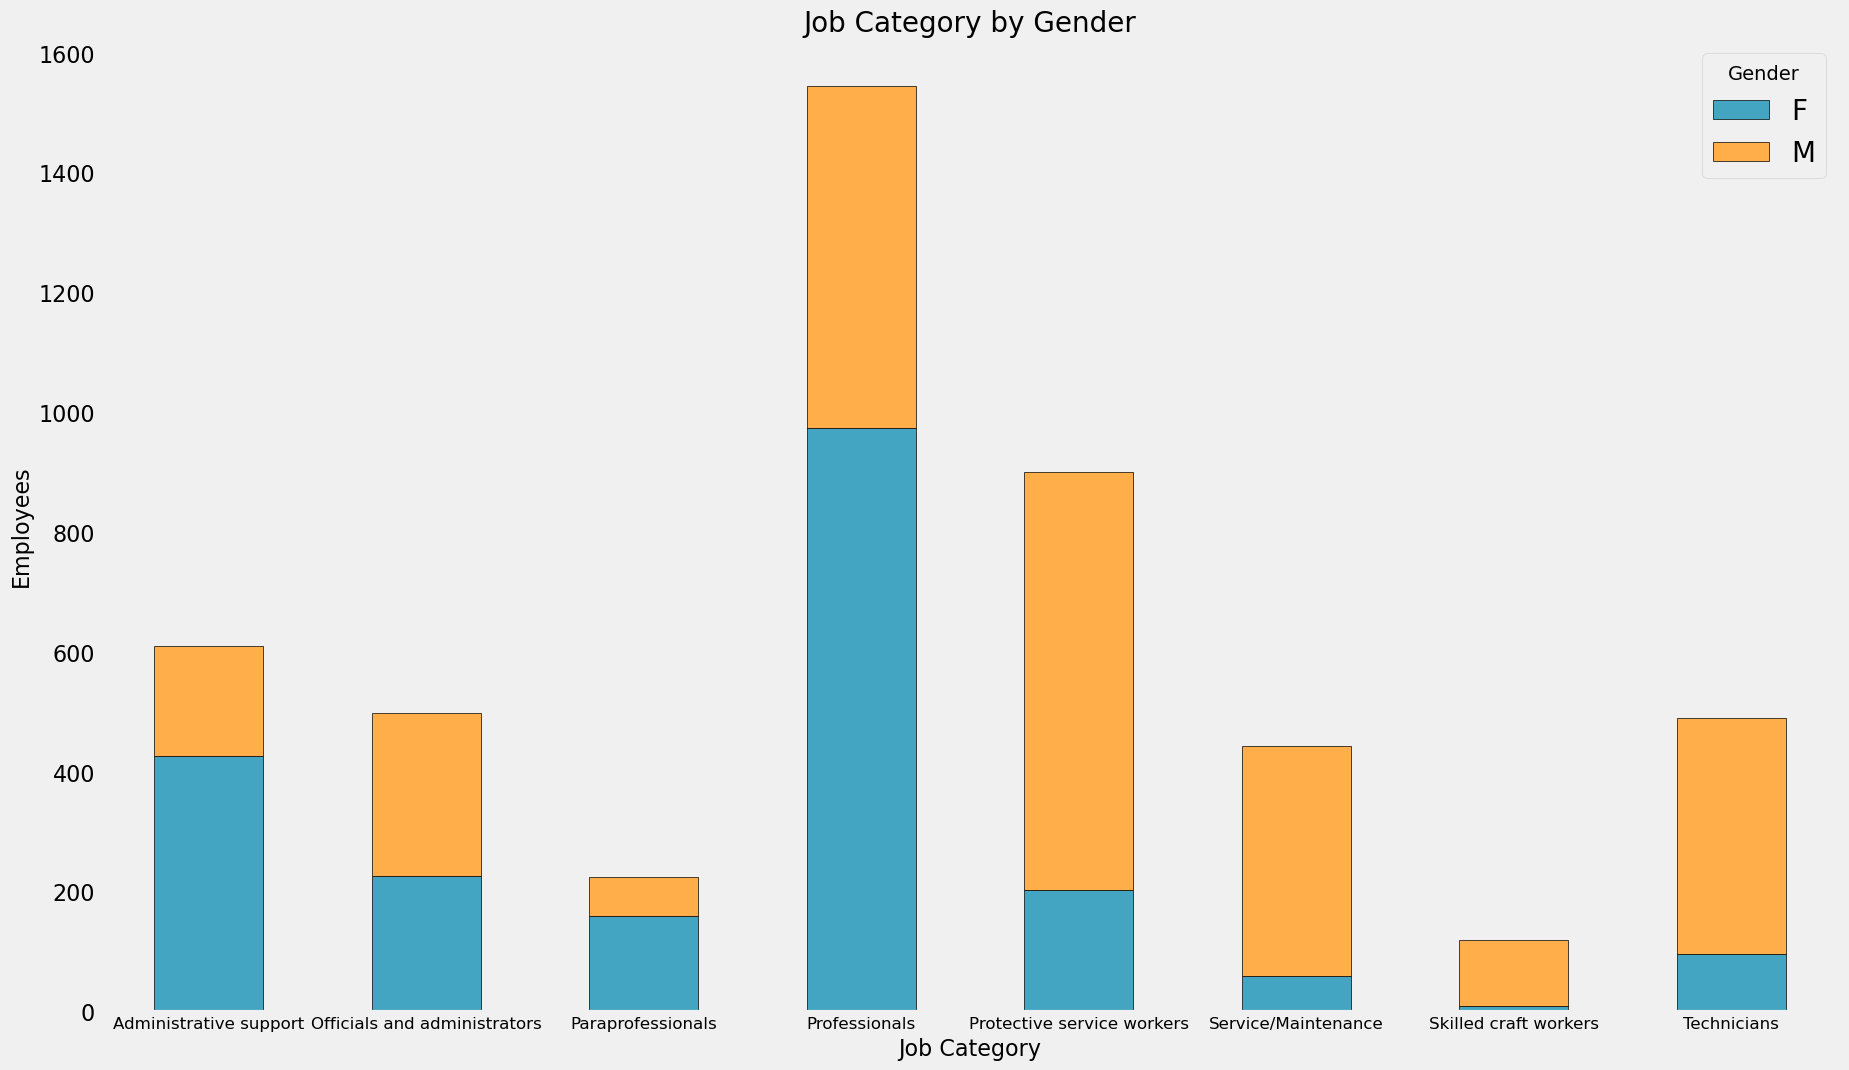

In [309]:
color = ["#44a5c2", "#ffae49"]
dav_emp_Postion.plot(kind = 'bar',figsize = (20,12),stacked =True, color=color, edgecolor='black', linewidth=0.5, grid=False)
plt.title('Job Category by Gender',fontsize =20)
plt.xlabel('Job Category',fontsize =16)
plt.ylabel('Employees',fontsize =16)
plt.yticks(fontsize = 16)
plt.legend(title = 'Gender',fontsize =20)
plt.xticks(rotation = 0,fontsize = 12)
plt.style.use('fivethirtyeight')
plt.show()

# Race/Ethnicity

In [298]:
dav_fulltime_emp.head(3)

,index,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
0,1,OR04,72688.60,7753,Professional Spec,Police,Fulltime,Professionals,F,White,1952,1972-08-18,Y,Davidson,2024,72,70 to 74 years,1972,52
1,2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black,1950,1973-02-26,Y,Davidson,2024,74,70 to 74 years,1973,51
2,3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,1974-09-01,Y,Davidson,2024,68,67 to 69 years,1974,50


In [299]:
emp_by_race = dav_fulltime_emp['Ethnic Code Description'].value_counts().reset_index()

In [302]:
emp_by_race.rename(columns = {'count':'Total Employees'},inplace = True)
emp_by_race


,Ethnic Code Description,Total Employees
0,White,2450
1,Black,1977
2,Hispanic,196
3,Two or more,128
4,Asian,71
5,Native,5
6,Islander,4


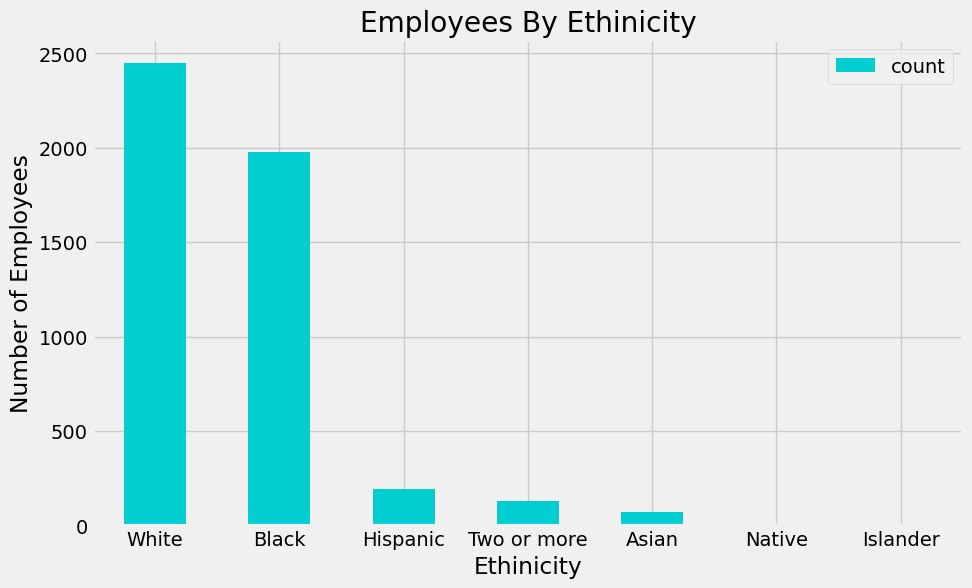

In [311]:

emp_by_ethinicity.plot(kind = 'bar',x= 'Ethnic Code Description',figsize = (10,6),color = 'darkturquoise')
plt.xlabel('Ethinicity')
plt.ylabel('Number of Employees')
plt.title('Employees By Ethinicity')
plt.xticks(rotation = 0)

plt.show()

In [313]:
#Officials and Administrators
dav_fulltime_admins = dav_fulltime_emp[dav_fulltime_emp['EEO Job Category Description'] == 'Officials and administrators']
dav_fulltime_admins

,index,Pay Grade / Step,Annual Salary,Class,Title,Current Department,Employment Status,EEO Job Category Description,Gender,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt?,County,Current_Year,Age,Age_Group,Started_Year,Year_Of_Service
1,2,OR07,113468.17,7242,Admin Svcs Mgr,Water Services,Fulltime,Officials and administrators,M,Black,1950,1973-02-26,Y,Davidson,2024,74,70 to 74 years,1973,51
2,3,OR09,121002.72,10863,Admin Svcs Division Manager,Metropolitan Council,Fulltime,Officials and administrators,F,White,1956,1974-09-01,Y,Davidson,2024,68,67 to 69 years,1974,50
6,9,OR07,97654.57,7242,Admin Svcs Mgr,Juvenile Court,Fulltime,Officials and administrators,F,Black,1959,1977-10-16,Y,Davidson,2024,65,65 to 66 years,1977,47
10,13,OR07,113468.17,11272,Transportation Superintendent,NDOT,Fulltime,Officials and administrators,M,White,1960,1978-10-16,Y,Davidson,2024,64,62 to 64 years,1978,46
12,17,FD11,142808.86,10712,Fire Commander,Fire,Fulltime,Officials and administrators,M,White,1955,1979-10-16,Y,Davidson,2024,69,67 to 69 years,1979,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758,10642,ST09,50452.95,7732,Compliance Inspector 2,NDOT,Fulltime,Officials and administrators,F,Black,1979,2024-03-04,N,Davidson,2024,45,45 to 49 years,2024,0
4762,10647,OR07,92000.00,7242,Admin Svcs Mgr,NDOT,Fulltime,Officials and administrators,M,White,1994,2024-03-04,Y,Davidson,2024,30,30 to 34 years,2024,0
4768,10656,OR09,94249.13,10129,Planning Mgr 1,Planning Commission,Fulltime,Officials and administrators,M,White,1985,2024-03-04,Y,Davidson,2024,39,35 to 39 years,2024,0
4779,10680,OR08,87529.74,7234,Information Systems Advisor 1,Information Technology Services,Fulltime,Officials and administrators,M,White,1985,2024-03-16,Y,Davidson,2024,39,35 to 39 years,2024,0


In [326]:
#fix and use it latter
admins_ethincity = dav_fulltime_admins.groupby('EEO Job Category Description')['Ethnic Code Description'].value_counts().reset_index()
admins_ethincity.rename(columns = {'count':'Total Employees'},inplace = True)
admins_ethincity

,EEO Job Category Description,Ethnic Code Description,Total Employees
0,Officials and administrators,White,322
1,Officials and administrators,Black,150
2,Officials and administrators,Asian,10
3,Officials and administrators,Hispanic,10
4,Officials and administrators,Two or more,6
5,Officials and administrators,Native,1


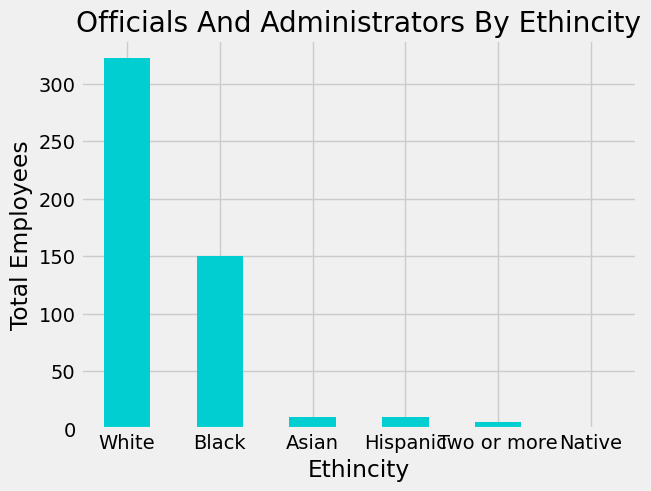

In [333]:
admins_ethincity.plot(kind = 'bar', x = 'Ethnic Code Description',  color = 'darkturquoise',legend = False)
plt.xlabel('Ethincity')
plt.ylabel('Total Employees')
plt.title('Officials And Administrators By Ethincity')
plt.xticks(rotation = 0)

plt.show()